# Gathering

In [1]:
import pandas as pd

In [2]:
df_bestofrt = pd.read_csv('bestofrt.tsv', sep='\t')

In [3]:
df_bestofrt.head()

,ranking,critic_score,title,number_of_critic_ratings
0,1,99,The Wizard of Oz (1939),110
1,2,100,Citizen Kane (1941),75
2,3,100,The Third Man (1949),77
3,4,99,Get Out (2017),282
4,5,97,Mad Max: Fury Road (2015),370


In [4]:
df_bestofrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
ranking                     100 non-null int64
critic_score                100 non-null int64
title                       100 non-null object
number_of_critic_ratings    100 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.2+ KB


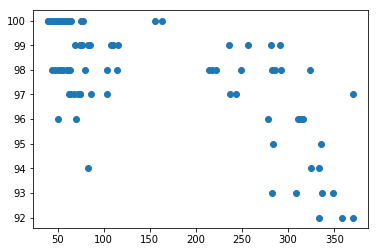

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_bestofrt.number_of_critic_ratings, df_bestofrt.critic_score)

## 爬取在线网页数据

In [6]:
import requests

In [7]:
url = 'https://www.rottentomatoes.com/m/et_the_extraterrestrial'
response = requests.get(url)

In [8]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, 'lxml')

In [9]:
# soup

In [10]:
soup.find('title').contents

['E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes']

In [11]:
soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]

'E.T. The Extra-Terrestrial (1982)'

In [12]:
len(' - Rotten Tomatoes')

18

In [13]:
soup.find('title')

<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

In [14]:
soup.findAll('h2', class_= 'mop-ratings-wrap__score')

[<h2 class="mop-ratings-wrap__score">
 <a class="unstyled articleLink mop-ratings-wrap__icon-link" href="#contentReviews" id="tomato_meter_link">
 <span class="mop-ratings-wrap__icon meter-tomato icon big medium-xs certified_fresh"></span>
 <span class="mop-ratings-wrap__percentage">
                     98%
                 </span>
 </a>
 </h2>, <h2 class="mop-ratings-wrap__score">
 <a class="unstyled articleLink mop-ratings-wrap__icon-link" href="#audience_reviews">
 <span class="mop-ratings-wrap__icon meter-tomato icon big medium-xs upright"></span>
 <span class="mop-ratings-wrap__percentage">
                     72%
                 </span>
 </a>
 </h2>]

In [15]:
soup.find('span', class_= 'mop-ratings-wrap__percentage').contents

['\n                    98%\n                ']

In [16]:
soup.find('span', class_= 'mop-ratings-wrap__percentage').contents[0].strip()[:-1]

'98'

In [17]:
soup.findAll('span', class_= 'mop-ratings-wrap__percentage')[1].contents

['\n                    72%\n                ']

In [18]:
soup.findAll('span', class_= 'mop-ratings-wrap__percentage')[1].contents[0].strip()[:-1]

'72'

In [19]:
num_audience_ratings = soup.findAll("strong", class_= 'mop-ratings-wrap__text--small')[1].contents[0].strip()
num_audience_ratings = num_audience_ratings.split(":")
num_audience_ratings = int(num_audience_ratings[1].replace(',', ''))
num_audience_ratings

32314349

## 爬取本地网页数据

In [20]:
import zipfile
with zipfile.ZipFile('rt-html.zip', 'r') as myzip:
    myzip.extractall()

In [21]:
import os
from bs4 import BeautifulSoup
df_list = []
folder = 'rt_html'
for movie_html in os.listdir(folder):
    with open(os.path.join(folder, movie_html) ,encoding='utf-8') as file:
        soup = BeautifulSoup(file, 'lxml')
        title = soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]
        audience_score = soup.find('div', class_='audience-score meter').find('span').contents[0][:-1]
        num_audience_ratings = soup.find('div', class_='audience-info hidden-xs superPageFontColor')
        num_audience_ratings = num_audience_ratings.find_all('div')[1].contents[2].strip().replace(',','')
        df_list.append({'title': title,
                       'audience_score': int(audience_score),
                       'number_of_audience_ratings': int(num_audience_ratings)})
df_html = pd.DataFrame(df_list, columns=['title', 'audience_score', 'number_of_audience_ratings'])
df_html

,title,audience_score,number_of_audience_ratings
0,The Grapes of Wrath (1940),88,23954
1,Gravity (2013),80,301261
2,Rear Window (1954),95,149458
3,It Happened One Night (1934),93,33106
4,Finding Nemo (2003),86,33355673
5,Selma (2015),86,60533
6,Up (2009),90,1201878
7,"Nosferatu, a Symphony of Horror (Nosferatu, ei...",87,47463
8,Metropolis (1927),92,62018
9,The 400 Blows (Les Quatre cents coups) (1959),94,38368


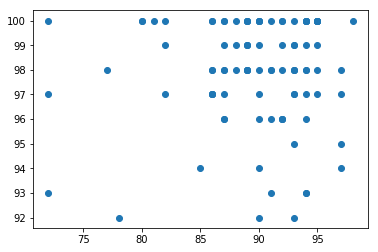

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df_html.audience_score, df_bestofrt.critic_score)

In [23]:
with open('rt_html/et_the_extraterrestrial.html') as file:
    soup = BeautifulSoup(file, 'lxml')

In [24]:
soup.find('title')

<title>E.T. The Extra-Terrestrial (1982) - Rotten Tomatoes</title>

In [25]:
soup.find('title').contents[0]

'E.T. The Extra-Terrestrial\xa0(1982) - Rotten Tomatoes'

In [26]:
soup.find('title').contents[0][:-len(' - Rotten Tomatoes')]

'E.T. The Extra-Terrestrial\xa0(1982)'

In [27]:
soup.find('title').contents[0][:-18]

'E.T. The Extra-Terrestrial\xa0(1982)'

In [28]:
soup.find(attrs={"class": "audience-score meter"})

<div class="audience-score meter">
<a class="unstyled articleLink" href="#audience_reviews"><div class="meter media">
<div class="meter-tomato icon big medium-xs upright pull-left"></div>
<div class="media-body" style="line-height:36px">
<div class="meter-value">
<span class="superPageFontColor" style="vertical-align:top">72%</span>
</div>
<div class="smaller bold hidden-xs superPageFontColor" style="padding-left:5px;line-height:12px">liked it</div>
</div>
</div>
</a></div>

In [29]:
soup.find('div', class_='audience-score meter').find('span').contents[0][:-1]

'72'

In [30]:
num_audience_ratings = soup.find("span", string="User Ratings:").parent.contents[2].strip()
num_audience_ratings = int(num_audience_ratings.replace(',', ''))
num_audience_ratings

32313030

## 爬取影评

In [31]:
import requests 
import pandas as pd
import os

In [32]:
folder_name_example = 'folder_name_example'
if not os.path.exists(folder_name_example):
    os.makedirs(folder_name_example)

In [33]:
urls = ['https://raw.githubusercontent.com/hufe09/data-analyst-nanodegree-lab/master/Gathering%20Data/ebert_reviews/1-the-wizard-of-oz-1939-film.txt',
        'https://raw.githubusercontent.com/hufe09/data-analyst-nanodegree-lab/master/Gathering%20Data/ebert_reviews/2-citizen-kane.txt']
for url in urls:
    response = requests.get(url)
    with open(os.path.join(folder_name_example, url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)

In [34]:
os.listdir(folder_name_example)

['2-citizen-kane.txt', '1-the-wizard-of-oz-1939-film.txt']

In [35]:
ebert_review_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9900_1-the-wizard-of-oz-1939-film/1-the-wizard-of-oz-1939-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_2-citizen-kane/2-citizen-kane.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9901_3-the-third-man/3-the-third-man.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_4-get-out-film/4-get-out-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_5-mad-max-fury-road/5-mad-max-fury-road.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9902_6-the-cabinet-of-dr.-caligari/6-the-cabinet-of-dr.-caligari.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_7-all-about-eve/7-all-about-eve.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_8-inside-out-2015-film/8-inside-out-2015-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9903_9-the-godfather/9-the-godfather.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_10-metropolis-1927-film/10-metropolis-1927-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_11-e.t.-the-extra-terrestrial/11-e.t.-the-extra-terrestrial.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_12-modern-times-film/12-modern-times-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9904_14-singin-in-the-rain/14-singin-in-the-rain.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_15-boyhood-film/15-boyhood-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_16-casablanca-film/16-casablanca-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9905_17-moonlight-2016-film/17-moonlight-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_18-psycho-1960-film/18-psycho-1960-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_19-laura-1944-film/19-laura-1944-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9906_20-nosferatu/20-nosferatu.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_21-snow-white-and-the-seven-dwarfs-1937-film/21-snow-white-and-the-seven-dwarfs-1937-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_22-a-hard-day27s-night-film/22-a-hard-day27s-night-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9907_23-la-grande-illusion/23-la-grande-illusion.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_25-the-battle-of-algiers/25-the-battle-of-algiers.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_26-dunkirk-2017-film/26-dunkirk-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9908_27-the-maltese-falcon-1941-film/27-the-maltese-falcon-1941-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_29-12-years-a-slave-film/29-12-years-a-slave-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_30-gravity-2013-film/30-gravity-2013-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9909_31-sunset-boulevard-film/31-sunset-boulevard-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_32-king-kong-1933-film/32-king-kong-1933-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_33-spotlight-film/33-spotlight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990a_34-the-adventures-of-robin-hood/34-the-adventures-of-robin-hood.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_35-rashomon/35-rashomon.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_36-rear-window/36-rear-window.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990b_37-selma-film/37-selma-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_38-taxi-driver/38-taxi-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_39-toy-story-3/39-toy-story-3.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990c_40-argo-2012-film/40-argo-2012-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_41-toy-story-2/41-toy-story-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_42-the-big-sick/42-the-big-sick.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_43-bride-of-frankenstein/43-bride-of-frankenstein.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990d_44-zootopia/44-zootopia.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_45-m-1931-film/45-m-1931-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_46-wonder-woman-2017-film/46-wonder-woman-2017-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990e_48-alien-film/48-alien-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_49-bicycle-thieves/49-bicycle-thieves.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_50-seven-samurai/50-seven-samurai.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad990f_51-the-treasure-of-the-sierra-madre-film/51-the-treasure-of-the-sierra-madre-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_52-up-2009-film/52-up-2009-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_53-12-angry-men-1957-film/53-12-angry-men-1957-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9910_54-the-400-blows/54-the-400-blows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_55-logan-film/55-logan-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9911_57-army-of-shadows/57-army-of-shadows.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_58-arrival-film/58-arrival-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9912_59-baby-driver/59-baby-driver.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_60-a-streetcar-named-desire-1951-film/60-a-streetcar-named-desire-1951-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_61-the-night-of-the-hunter-film/61-the-night-of-the-hunter-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_62-star-wars-the-force-awakens/62-star-wars-the-force-awakens.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9913_63-manchester-by-the-sea-film/63-manchester-by-the-sea-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_64-dr.-strangelove/64-dr.-strangelove.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_66-vertigo-film/66-vertigo-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9914_67-the-dark-knight-film/67-the-dark-knight-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_68-touch-of-evil/68-touch-of-evil.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_69-the-babadook/69-the-babadook.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9915_72-rosemary27s-baby-film/72-rosemary27s-baby-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_73-finding-nemo/73-finding-nemo.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9916_74-brooklyn-film/74-brooklyn-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_75-the-wrestler-2008-film/75-the-wrestler-2008-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9917_77-l.a.-confidential-film/77-l.a.-confidential-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_78-gone-with-the-wind-film/78-gone-with-the-wind-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_79-the-good-the-bad-and-the-ugly/79-the-good-the-bad-and-the-ugly.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9918_80-skyfall/80-skyfall.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_82-tokyo-story/82-tokyo-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_83-hell-or-high-water-film/83-hell-or-high-water-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_84-pinocchio-1940-film/84-pinocchio-1940-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad9919_85-the-jungle-book-2016-film/85-the-jungle-book-2016-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991a_86-la-la-land-film/86-la-la-land-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_87-star-trek-film/87-star-trek-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991b_89-apocalypse-now/89-apocalypse-now.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_90-on-the-waterfront/90-on-the-waterfront.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_91-the-wages-of-fear/91-the-wages-of-fear.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991c_92-the-last-picture-show/92-the-last-picture-show.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_93-harry-potter-and-the-deathly-hallows-part-2/93-harry-potter-and-the-deathly-hallows-part-2.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_94-the-grapes-of-wrath-film/94-the-grapes-of-wrath-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991d_96-man-on-wire/96-man-on-wire.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_97-jaws-film/97-jaws-film.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_98-toy-story/98-toy-story.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_99-the-godfather-part-ii/99-the-godfather-part-ii.txt',
                     'https://d17h27t6h515a5.cloudfront.net/topher/2017/September/59ad991e_100-battleship-potemkin/100-battleship-potemkin.txt']

``` Python
# Make directory if it doesn't already exist
folder_name = 'ebert_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
for url in ebert_review_urls:
    response = requests.get(url)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
```

In [36]:
import glob

In [37]:
folder_name = 'ebert_reviews'
df_list = []
for ebert_review in glob.glob('ebert_reviews/*.txt'):
    with open(ebert_review, encoding='utf-8') as file:
        title = file.readline()[:-1]
        review_url = file.readline()[:-1]
        review_text = file.read()
        df_list.append({'title': title,
                       'review_url': review_url,
                       'review_text': review_text})

In [38]:
df = pd.DataFrame(df_list, columns=['title', 'review_url', 'review_text'])
df

,title,review_url,review_text
0,The Maltese Falcon (1941),http://www.rogerebert.com/reviews/great-movie-...,Among the movies we not only love but treasure...
1,Up (2009),http://www.rogerebert.com/reviews/up-2009,"""Up"" is a wonderful film, with characters who ..."
2,Taxi Driver (1976),http://www.rogerebert.com/reviews/great-movie-...,"Are you talkin' to me? Well, I'm the only one ..."
3,The Wages of Fear (1953),http://www.rogerebert.com/reviews/the-wages-of...,"When the great French thriller ""The Wages of F..."
4,Sunset Boulevard (1950),http://www.rogerebert.com/reviews/great-movie-...,"Billy Wilder's ""Sunset Boulevard” is the portr..."
5,The Battle of Algiers (La Battaglia di Algeri)...,http://www.rogerebert.com/reviews/great-movie-...,The most common form of warfare since 1945 has...
6,Bicycle Thieves (Ladri di biciclette) (1949),http://www.rogerebert.com/reviews/great-movie-...,"""The Bicycle Thief"" is so well-entrenched as a..."
7,The Last Picture Show (1971),http://www.rogerebert.com/reviews/great-movie-...,"The best scene in ""The Last Picture Show"" take..."
8,Toy Story (1995),http://www.rogerebert.com/reviews/toy-story-1995,"""Toy Story"" creates a universe out of a couple..."
9,Tokyo Story (Tôkyô monogatari) (1953),http://www.rogerebert.com/reviews/great-movie-...,No story could be simpler. An old couple come ...


In [39]:
title_list = []
for t in df.title:
    title_list.append(t)
len(title_list)

88

## API 
### rtsimple

“MediaWiki” 有许多不同的“访问库 ”来满足现有的各种编程语言。

- Wikipedia-API：易于使用的Python 3库。
- wptools：维基百科工具（适用于人类）。
- Pywikibot：一组python脚本和一个强大的机器人写作库。
- wikitools：围绕API提供几层抽象。不支持Python 3。
- mwclient：一个Python库，可以访问大多数API函数....
- 等等....

对于MediaWiki，调用Python中最新的和[人类可读]的wptools。例如，Twitter的类似关系是：  

- MediaWiki API→wptools
- Twitter API→tweepy
- wptools指南：（https://github.com/siznax/wptools）
- tweepy准则：（https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf）

``` Python
import requests
from PIL import Image
from io import BytesIO

url = 'https://en.wikipedia.org/wiki/E.T._the_Extra-Terrestrial#/media/File:E_t_the_extra_terrestrial_ver3.jpg'
r = requests.get(url)
i = Image.open(BytesIO(r.content))
```

``` Python
import rtsimple as rt
rt.API_KEY = 'your api key'
movie = rt.Movies('10489')
```

``` Python
import wptools
page = wptools.page('Mahatma_Gandhi')
page.data['image'][0]['size']
```

![](https://user-images.githubusercontent.com/31917400/37098852-dc257a7a-2216-11e8-9805-8c54ad5da83d.jpg)

``` Python
page = wptools.page('Manchester_by_the_Sea_(film)').get()
images = page.data['image']
images[0]['url']
```

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.648h9pkgp8a.png)

`'https://upload.wikimedia.org/wikipedia/en/d/de/Manchester_by_the_Sea.jpg'`

图像文件，使用PIL库（枕头）和非文本请求的io库。  
例如：

``` Python
import pandas as pd
import requests   #general web scraping to RAM package 
import wptools   #'wikipedia-specific' web scraping package
import os   #filepath, folder editing package
from PIL import Image 
from io import BytesIO

folder_name = 'bestofrt_posters'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
df_list = []

image_errors = {}

for t in title_list:
    try:
        # This cell is slow so print ranking to gauge time remaining
        ranking = title_list.index(t) + 1
        print(ranking)
        pagee = wptools.page(t, silent=True)
        images = pagee.get().data['image']

        # First image is usually the poster. That's the image we want. Get the Url.
        first_image_url = images[0]['url']
        
        #Now we obtain the image file in our RAM !
        res = requests.get(first_image_url)
        
        # Download movie poster image
        i = Image.open(BytesIO(res.content))
        image_file_format = first_image_url.split('.')[-1]
        i.save(folder_name + "/" + str(ranking) + "_" + t + '.' + image_file_format)
        
        # Append to list of dictionaries
        df_list.append({'ranking': int(ranking),
                        'title': t,
                        'poster_url': first_image_url})
    
    # Not best practice to catch all exceptions but fine for this short script
    except Exception as e:
        print(str(ranking) + "_" + t + ": " + str(e))
        image_errors[str(ranking) + "_" + t] = images
```

## Writing JSON
将Python dict对象转换为序列化的JSON字符串。  
- `json.dump()`：它将dict对象以JSON格式写入“文本文件”。
- `json.dumps()`：略有变化json.dump()。它返回实际的JSON字符串，并在JSON str中提供更多控件。

In [40]:
import json

data = {}  
data['people'] = []  
data['people'].append({'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'})
data['people'].append({'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'})
data['people'].append({'name': 'Tim', 'website': 'apple.com', 'from': 'Alabama'})

with open('json_data.txt', 'w') as out_f:  
    json.dump(data, out_f)

## Reading  JSON
- `json.load()`：它从文件中读取字符串，解析JSON数据，使用数据填充Python dict并将其返回。
- `json.loads()`：略有变化`json.load()`。它允许我们直接处理str（因为很多时候你可能没有包含你的JSON的类文件对象）。

In [41]:
with open('json_data.txt') as json_f:  
    data = json.load(json_f)
data

{'people': [{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'},
  {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'},
  {'name': 'Tim', 'website': 'apple.com', 'from': 'Alabama'}]}

In [42]:
for p in data['people']:
    print('Name: ' + p['name'])
    print('Website: ' + p['website'])
    print('From: ' + p['from'])
    print('')

Name: Scott
Website: stackabuse.com
From: Nebraska

Name: Larry
Website: google.com
From: Michigan

Name: Tim
Website: apple.com
From: Alabama



## WordCloud

`$ pip install wordcloud`

In [43]:
ebert_review = './ebert_reviews/98-toy-story.txt'
with open(ebert_review, encoding='utf-8') as file:
    title = file.readline()[:-1]
    review_url = file.readline()[:-1]
    review_text = file.read()
    df_list.append({'title': title,
                   'review_url': review_url,
                   'review_text': review_text})

根据词频计算词云


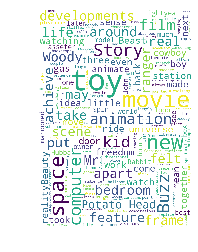

In [44]:
#-*- coding:utf-8 -*-
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 生成词云
def create_word_cloud(f):
    print('根据词频计算词云')  
    # 设置停用词
    stopwords = set(STOPWORDS)
    stopwords.update(["hello", "hi"])
    # 设置词云形状
    mask_img = np.array(Image.open(r"./toy-story.png"))
    
    wc = WordCloud(
     background_color='white',# 设置背景颜色
#      font_path='../../fonts/SimHei.ttf',  # 设置字体，针对中文的情况需要设置中文字体，否则显示乱码
     max_font_size=150,# 设置字体最大值
     width=1080,# 设置画布的宽度
     height=1920,# 设置画布的高度
     random_state=30,# 设置多少种随机状态，即多少种颜色
     mask = mask_img, 
     stopwords = stopwords
    )
    wordcloud = wc.generate(f)
     # 写词云图片
    wordcloud.to_file("./wordcloud.jpg")
     # 显示词云文件
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
create_word_cloud(review_text)